<a href="https://colab.research.google.com/github/Karliene-Evelyn/G-Assimila/blob/main/Lorenz_DA_Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program to perform data assimilation on the Lorenz equations
###  (c) 2002  Data Assimilation Research Centre
### Original program by Matthew Martin

# **Instala o Octave e o plugin para jupyter notebook**

In [ ]:
!apt install octave

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [ ]:
!pip install oct2py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00


In [ ]:
%load_ext oct2py.ipython

# MAIN PROGRAM



## 0. PROGRAM's BRIEF DESCRIPTION

In [ ]:
%%octave

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Program to perform data assimilation on the
% Lorenz equations
%
%
%  (c) 2002  Data Assimilation Research Centre
%
%  Original program by Matthew Martin
%
%  Change history:
%      Changes to make code more robust and add further options
%                       (Amos Lawless)
%      23/01/03 Change to position windows correctly for any screen
%               resolution (Amos Lawless)
%      16/07/04 Change to initial conditions and run time
%
%  Structure of program:
%    1. Inputs
%    2. `True' solution
%    3. Background solution
%    4. Observations
%    5. Covariance matrices
%    6. Assimilation
%    7. Plot results.
%
%  List of main variables
%    h:          Time step for Runge-Kutta scheme
%    s:          sigma coefficient in equations
%    r:          rho coefficient in equations
%    b:          beta coefficient in equations
%
%    fmax:       Total time of assimilation + forecast
%    ob_f:       Frequency of observations in time steps
%    q:          x-axis data values for plots
%    sd:         Variance of observation error
%    tmax:       Total time of assimilation
%
%    R(3,3):     Observation error covariance matrix
%    B(3,3):     Background error covariance matrix
%    Qx(3,3,fmax): Model error covariance matrix for Kalman Filter
%                  (default constant in time)
%
%    x(fmax,1), y(fmax,1), z(fmax,1):
%                True state vectors of x,y,z
%    xb(fmax,1), yb(fmax,1), zb(fmax,1):
%                Background state vectors of x,y,z
%    xob(tmax), yob(tmax), zob(tmax)
%                Observations of x,y,z
%
%    x_ob(3,tmax): [xob';yob';zob']
%    x_sc(3,fmax): Analysis and forecast from SC scheme, with first
%                  index representing x, y or z variable
%    x_ac(3,fmax): Analysis and forecast from AC scheme, with first
%                  index representing x, y or z variable
%    x_oi(3,fmax): Analysis and forecast from OI scheme, with first
%                  index representing x, y or z variable
%    x_kf(3,fmax): Analysis and forecast from Kalman Filter, with first
%                  index representing x, y or z variable
%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



## 1. INPUTS

In [ ]:
%%octave

%---------------------------------------------------------------------
%%%%%%%%%%1.  INPUTS
%---------------------------------------------------------------------

%----- Please choose an assimilation scheme -----
%      1) Successive correction
%      2) Optimal Interpolation
%      3) Analysis Correction
%      4) Kalman Filter
%      Select a menu number:
l_assim = 4;
l_assim=l_assim-1;

if (l_assim==0 | l_assim==2)
  %----- How many iterations? -----
  %      1
  %      2
  %      3
  %      4
  %      5
  n_its = 4
end
if l_assim~=0

%----- Use correct weighting matrices? -----
%      1) No
%      2) Yes
   l_weight = 2;
   l_weight=l_weight-1;
end
fmax=1000;	%time of assimilation + forecast
q=0:0.01:fmax*0.01-0.01;

## 2. TRUE SOLUTION
### True solution of lorenz equations using 2nd order Runge-Kutta method

In [ ]:
%%octave

%-------------------------------------------------------------------------
%%%%%%%%%2.  TRUE SOLUTION
%-------------------------------------------------------------------------
%true solution of lorenz equations using 2nd order Runge-Kutta method
x=zeros(fmax,1);
y=zeros(fmax,1);
z=zeros(fmax,1);

### parameters

In [ ]:
%%octave

%parameters
h=0.01;    % time step for Runge-Kutta scheme
s=10.0;    % sigma
r=28;      % rho
b=8/3;     % beta

### initial contidions

In [ ]:
%%octave

%initial conditions
x(1)=-5.4458d0;
y(1)=-5.4841d0;
z(1)=22.5606d0;

for i=1:fmax-1
k1x(i)=s*y(i)-s*x(i);
k1y(i)=r*x(i)-y(i)-x(i)*z(i);
k1z(i)=x(i)*y(i)-b*z(i);

k2x(i)=s*(y(i)+h*k1y(i))-s*(x(i)+h*k1x(i));
k2y(i)=r*(x(i)+h*k1x(i))-(y(i)+h*k1y(i))-(x(i)+h*k1x(i))*(z(i)+h*k1z(i));
k2z(i)=(x(i)+h*k1x(i))*(y(i)+h*k1y(i))-b*(z(i)+h*k1z(i));

x(i+1)=x(i)+0.5*h*(k1x(i)+k2x(i));
y(i+1)=y(i)+0.5*h*(k1y(i)+k2y(i));
z(i+1)=z(i)+0.5*h*(k1z(i)+k2z(i));

end
disp(['*   done true solution'])

*   done true solution

### Plot true solution of x

ans = -17.239

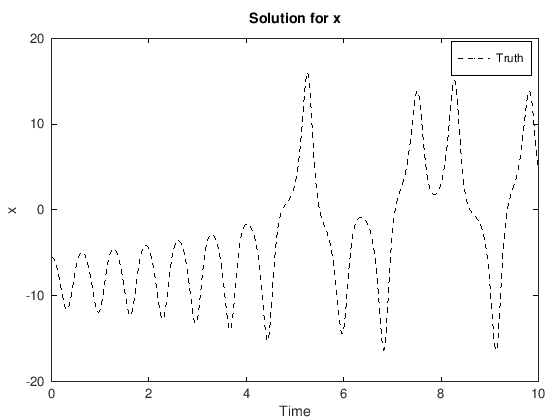

In [ ]:
%%octave

%Plot true solution of x
h1=figure(1);
clf;
plot(q,x,'k--');
legend("Truth")
xlabel("Time")
ylabel("x")
title("Solution for x")
hold on

### Plot true solution of z

ans = -17.457

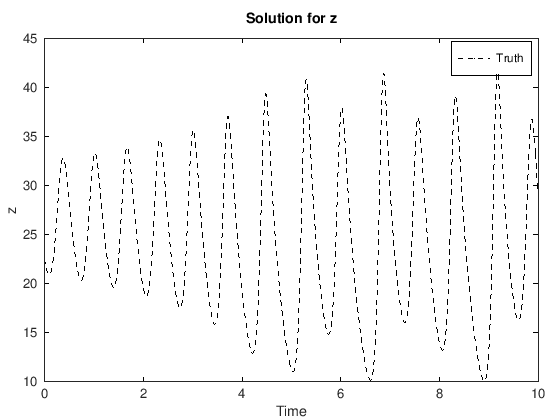

In [ ]:
%%octave

h2=figure(2);
clf;
plot(q,z,'k--');
legend("Truth")
xlabel("Time")
ylabel("z")
title('Solution for z')
hold on

## 3. BACKGROUND SOLUTION
### Produce a background solution which starts from some perturbed initial conditions

In [ ]:
%%octave

%-----------------------------------------------------------------------
%%%%%%%%%3.  BACKGROUND SOLUTION
%-----------------------------------------------------------------------
%Produce a background solution which starts from some perturbed initial
%conditions.

xb=zeros(fmax,1);
yb=zeros(fmax,1);
zb=zeros(fmax,1);

### Background solution initial condition

In [ ]:
%%octave

%initial conditions
%x(1)=-5.4458d0;
%y(1)=-5.4841d0;
%z(1)=22.5606d0;

%Background solution initial conditions
%bg_noise=randn(3,1);
%xb(1)=x(1)+bg_noise(1)*2.0d0;
%yb(1)=y(1)+bg_noise(2)*2.0d0;
%zb(1)=z(1)+bg_noise(3)*2.0d0;
xb(1)=-5.9d0;
yb(1)=-5.0d0;
zb(1)=24.0d0;

### Loop over time

In [ ]:
%%octave

%start loop over time
for i=1:fmax-1

k1xb(i)=s*yb(i)-s*xb(i);
k1yb(i)=r*xb(i)-yb(i)-xb(i)*zb(i);
k1zb(i)=xb(i)*yb(i)-b*zb(i);

k2xb(i)=s*(yb(i)+h*k1yb(i))-s*(xb(i)+h*k1xb(i));
k2yb(i)=r*(xb(i)+h*k1xb(i))-(yb(i)+h*k1yb(i))-(xb(i)+h*k1xb(i))...
*(zb(i)+h*k1zb(i));
k2zb(i)=(xb(i)+h*k1xb(i))*(yb(i)+h*k1yb(i))-b*(zb(i)+h*k1zb(i));

xb(i+1)=xb(i)+0.5*h*(k1xb(i)+k2xb(i));
yb(i+1)=yb(i)+0.5*h*(k1yb(i)+k2yb(i));
zb(i+1)=zb(i)+0.5*h*(k1zb(i)+k2zb(i));

end
%end loop over time
disp(['*   done background solution'])

*   done background solution

### Plot background solution

ans = -16.114

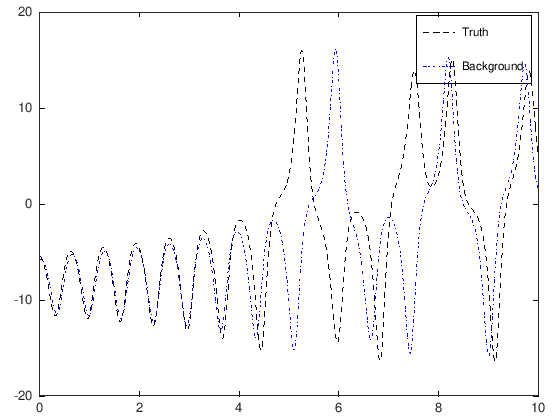

In [ ]:
%%octave

%Plot background solution
figure(h1)
plot(q,x,'k--');
hold on
plot(q,xb,'b-.');
legend("Truth","Background")
hold on

ans = -16.126

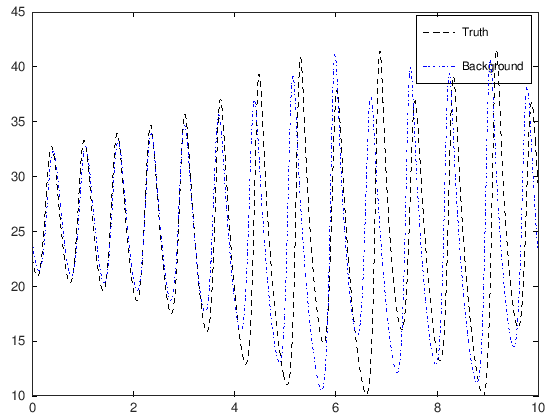

In [ ]:
%%octave
figure(h2)
plot(q,z,'k--');
hold on
plot(q,zb,'b-.');
legend("Truth","Background")
hold on



## 4. OBSERVATIONS

### Choose number of time steps between observations

In [ ]:
%%octave

%-----------------------------------------------------------------------------------
%%%%%%%4  OBSERVATIONS
%-----------------------------------------------------------------------------------

%----- How many time steps between observations? -----
%      25
%      50
%      100
%      200
ob_f=25;

%----- Noise on observations? -----
%      1) No
%      2) Yes
% Select a menu number:
l_noise=2;
l_noise=l_noise-1;
tmax=600+ob_f; %time of assimilation (janela de assimilação)

    _pyeval at line 28 column 9

### The observations are calculated from the true solution at certain points with noise added.

In [ ]:
%%octave

%The observations are calculated from the true solution at certain
%points with noise added.

xob=zeros(tmax,1);
yob=zeros(tmax,1);
zob=zeros(tmax,1);

nobs=tmax/ob_f;	%number of observations
vec=1:ob_f:tmax;

if l_noise==1
  l_read_noise=1;
  l_read_noise=l_read_noise-1;
  if (l_read_noise==0)
    sc_x_noise=randn(nobs,1);
    sc_y_noise=randn(nobs,1);
    sc_z_noise=randn(nobs,1);
    save ('noise.mat','sc_x_noise','sc_y_noise','sc_z_noise');
  elseif (l_read_noise==1)
    load('noise.mat','sc_x_noise','sc_y_noise','sc_z_noise');
  else
    error('Invalid input')
  end
  sd=0.1;
  var=sqrt(sd);
  RX=var*sc_x_noise;
  RY=var*sc_y_noise;
  RZ=var*sc_z_noise;
else
  for i=1:nobs;
    RX(i)=0.0;
    RY(i)=0.0;
    RZ(i)=0.0;
  end
end

j=1;
for i=vec
xob(i)=x(i)+RX(j);
yob(i)=y(i)+RY(j);
zob(i)=z(i)+RZ(j);
j=j+1;
end
disp(['*   done observations'])



*   done observations

### Plot x observations

ans = -15.110

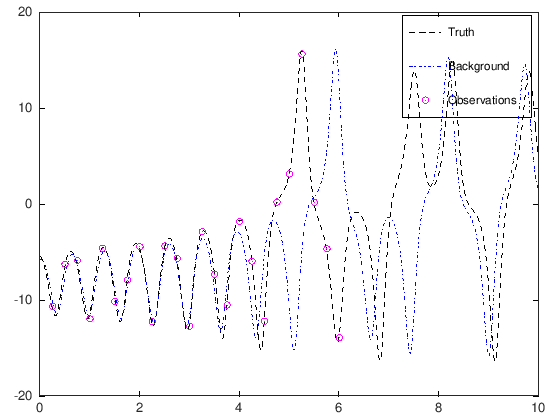

In [ ]:
%%octave

%Plot x observations
v=0.01*vec;
figure(h1)
plot(q,x,'k--');
hold on
plot(q,xb,'b-.');
plot(v(2:nobs),xob(vec(2:nobs)),'om');
legend("Truth","Background","Observations")
hold on



### Plot z observations

ans = -15.516

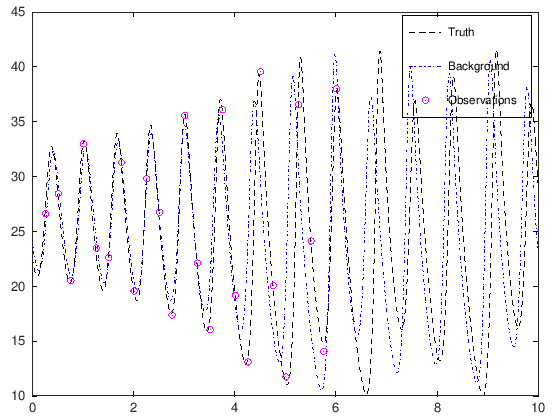

In [ ]:
%%octave

figure(h2)
plot(q,z,'k--');
hold on
plot(q,zb,'b-.');
plot(v(2:nobs),zob(vec(2:nobs)),'om');
legend("Truth","Background","Observations")
hold on



## 5. ERROR COVARIANCE MATRICES

In [ ]:
%%octave

%-----------------------------------------------------------------------------------
%%%%%%%5.  ERROR COVARIANCE MATRICES
%-----------------------------------------------------------------------------------
% l_test=menu_asl('Click to perform analysis','OK');
if l_assim~=0

BX=zeros(3,3);
BXi=zeros(3,3,tmax);
R=zeros(3,3);
Ri=zeros(3,3,nobs);

%Observation error covariance matrix, R.
%Calculated to be the average errors over time between
%the observations and true solution at the observation points.
R=zeros(3,3);
  for i=vec
    Ri(1,1,i)=(x(i)-xob(i))'*(x(i)-xob(i));
    Ri(1,2,i)=(x(i)-xob(i))'*(y(i)-yob(i));
    Ri(1,3,i)=(x(i)-xob(i))'*(z(i)-zob(i));
    Ri(2,1,i)=(y(i)-yob(i))'*(x(i)-xob(i));
    Ri(2,2,i)=(y(i)-yob(i))'*(y(i)-yob(i));
    Ri(2,3,i)=(y(i)-yob(i))'*(z(i)-zob(i));
    Ri(3,1,i)=(z(i)-zob(i))'*(x(i)-xob(i));
    Ri(3,2,i)=(z(i)-zob(i))'*(y(i)-yob(i));
    Ri(3,3,i)=(z(i)-zob(i))'*(z(i)-zob(i));
  end

if l_weight==1
  Rj=zeros(3,3,nobs);
  for j=1:3
    for k=1:3
      Rj(j,k,:)=Ri(j,k,vec);
      R(j,k)=(1/nobs)*sum(Rj(j,k,:));
    end
  end
else
  R=eye(3,3);  % Set to identity matrix for l_weight==0
end

%Background error covariance matrix.
%Calculated to be the average errors over time between the
%background and true solutions.
B=zeros(3,3);
if l_weight==1
  for i=1:tmax
    BXi(1,1,i)=(x(i)-xb(i))'*(x(i)-xb(i));
    BXi(1,2,i)=(x(i)-xb(i))'*(y(i)-yb(i));
    BXi(1,3,i)=(x(i)-xb(i))'*(z(i)-zb(i));
    BXi(2,1,i)=(y(i)-yb(i))'*(x(i)-xb(i));
    BXi(2,2,i)=(y(i)-yb(i))'*(y(i)-yb(i));
    BXi(2,3,i)=(y(i)-yb(i))'*(z(i)-zb(i));
    BXi(3,1,i)=(z(i)-zb(i))'*(x(i)-xb(i));
    BXi(3,2,i)=(z(i)-zb(i))'*(y(i)-yb(i));
    BXi(3,3,i)=(z(i)-zb(i))'*(z(i)-zb(i));
  end
  for j=1:3
    for k=1:3
      BX(j,k)=(1/tmax)*sum(BXi(j,k,:));
    end
  end
else
  BX=eye(3,3);  % Set to identity matrix for l_weight==0
end  % l_weight==1

end  % l_assim~=0

### 6. DATA ASSIMILATION

In [ ]:
%%octave

%-----------------------------------------------------------------------------------
%%%%%%%%%%6.  DATA ASSIMILATION
%-----------------------------------------------------------------------------------


if l_assim==0
%%%%%%%%%%%%%%%%%% SUCCESSIVE CORRECTIONS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
disp('Performing successive correction analysis')
assim_str='Successive correction';
x_ob=zeros(3,fmax);
x_sc=zeros(3,fmax);
WX=zeros(3,3);

%state weighting matrix
WX=0.5*eye(3,3);

%forecast at the initial time is the background there.
xfc(1)=xb(1);
yfc(1)=yb(1);
zfc(1)=zb(1);

x_ob=[xob';yob';zob'];
x_sc(:,1)=[xb(1);yb(1);zb(1)];


%Start Loop over time
for i=1:fmax-1

  if i>=tmax
    x_ob(:,i+1)=0;
  end

%Forecast to time step i+1
  xfc(i)=x_sc(1,i);
  yfc(i)=x_sc(2,i);
  zfc(i)=x_sc(3,i);

  k1xfc(i)=s*yfc(i)-s*xfc(i);
  k1yfc(i)=r*xfc(i)-yfc(i)-xfc(i)*zfc(i);
  k1zfc(i)=xfc(i)*yfc(i)-b*zfc(i);

  k2xfc(i)=s*(yfc(i)+h*k1yfc(i))-s*(xfc(i)+h*k1xfc(i));
  k2yfc(i)=r*(xfc(i)+h*k1xfc(i))-(yfc(i)+h*k1yfc(i))-(xfc(i)+h*k1xfc(i))...
  *(zfc(i)+h*k1zfc(i));
  k2zfc(i)=(xfc(i)+h*k1xfc(i))*(yfc(i)+h*k1yfc(i))-b*(zfc(i)+h*k1zfc(i));

  xfc(i+1)=xfc(i)+0.5*h*(k1xfc(i)+k2xfc(i));
  yfc(i+1)=yfc(i)+0.5*h*(k1yfc(i)+k2yfc(i));
  zfc(i+1)=zfc(i)+0.5*h*(k1zfc(i)+k2zfc(i));

%If there is an observation then produce an analysis
  if x_ob(:,i+1)~=0
    x_sc(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];

    for j=1:n_its
      x_sc(:,i+1)=x_sc(:,i+1)+WX*(x_ob(:,i+1)-x_sc(:,i+1));
    end

  else

    x_sc(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];

  end
end



elseif l_assim==1
%%%%%%%%%%%%%%%%%% OPTIMAL INTERPOLATION %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
disp('Performing OI analysis')
assim_str='Optimal interpolation';

x_ob=zeros(3,fmax);
x_oi=zeros(3,fmax);
WX=zeros(3,3);

xfc(1)=xb(1);
yfc(1)=yb(1);
zfc(1)=zb(1);

%state weighting matrix
WX=BX*pinv(BX+R);

x_ob=[xob';yob';zob'];
x_oi(:,1)=[xb(1);yb(1);zb(1)];

%Start loop over time
for i=1:fmax-1

  if i>=tmax
    x_ob(:,i+1)=0;
  end

%Forecast to time step i+1
  xfc(i)=x_oi(1,i);
  yfc(i)=x_oi(2,i);
  zfc(i)=x_oi(3,i);

  k1xfc(i)=s*yfc(i)-s*xfc(i);
  k1yfc(i)=r*xfc(i)-yfc(i)-xfc(i)*zfc(i);
  k1zfc(i)=xfc(i)*yfc(i)-b*zfc(i);

  k2xfc(i)=s*(yfc(i)+h*k1yfc(i))-s*(xfc(i)+h*k1xfc(i));
  k2yfc(i)=r*(xfc(i)+h*k1xfc(i))-(yfc(i)+h*k1yfc(i))-(xfc(i)+h*k1xfc(i))...
  *(zfc(i)+h*k1zfc(i));
  k2zfc(i)=(xfc(i)+h*k1xfc(i))*(yfc(i)+h*k1yfc(i))-b*(zfc(i)+h*k1zfc(i));

  xfc(i+1)=xfc(i)+0.5*h*(k1xfc(i)+k2xfc(i));
  yfc(i+1)=yfc(i)+0.5*h*(k1yfc(i)+k2yfc(i));
  zfc(i+1)=zfc(i)+0.5*h*(k1zfc(i)+k2zfc(i));

%If there is an observation then produce analysis
  if x_ob(:,i+1)~=0

    x_oi(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];
    x_oi(:,i+1)=x_oi(:,i+1)+WX*(x_ob(:,i+1)-x_oi(:,i+1));

  else

    x_oi(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];

  end
end

elseif l_assim==2
%%%%%%%%%%%%%%%%%%%%%%%%%% ANALYSIS CORRECTION %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
disp('Performing AC analysis')
assim_str='Analysis correction';

if l_noise==0
  R=eye(3,3);
end
x_ob=zeros(3,fmax);
x_ac=zeros(3,fmax);
y_ac=zeros(3,fmax);

WX=zeros(3,3); %=BXR^{-1}
QX=zeros(3,3); %=(WX+I)^{-1}

xfc(1)=xb(1);
yfc(1)=yb(1);
zfc(1)=zb(1);

%state weighting matrix
WX=BX*pinv(R)
QX=pinv(WX+eye(3,3))

x_ob=[xob';yob';zob'];
x_ac(:,1)=[xb(1);yb(1);zb(1)];
y_ac(:,1)=x_ob(:,1);

%Start loop over time
for i=1:fmax-1

  if i>=tmax
    x_ob(:,i+1)=0;
  end

%Forecast to time step i+1
  xfc(i)=x_ac(1,i);
  yfc(i)=x_ac(2,i);
  zfc(i)=x_ac(3,i);

  k1xfc(i)=s*yfc(i)-s*xfc(i);
  k1yfc(i)=r*xfc(i)-yfc(i)-xfc(i)*zfc(i);
  k1zfc(i)=xfc(i)*yfc(i)-b*zfc(i);

  k2xfc(i)=s*(yfc(i)+h*k1yfc(i))-s*(xfc(i)+h*k1xfc(i));
  k2yfc(i)=r*(xfc(i)+h*k1xfc(i))-(yfc(i)+h*k1yfc(i))-(xfc(i)+h*k1xfc(i))...
  *(zfc(i)+h*k1zfc(i));
  k2zfc(i)=(xfc(i)+h*k1xfc(i))*(yfc(i)+h*k1yfc(i))-b*(zfc(i)+h*k1zfc(i));

  xfc(i+1)=xfc(i)+0.5*h*(k1xfc(i)+k2xfc(i));
  yfc(i+1)=yfc(i)+0.5*h*(k1yfc(i)+k2yfc(i));
  zfc(i+1)=zfc(i)+0.5*h*(k1zfc(i)+k2zfc(i));

%If there is an observation then produce an analysis
  if x_ob(:,i+1)~=0
    x_ac(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];
    y_ac(:,i+1)=x_ob(:,i+1);

    for j=1:n_its
      x_ac(:,i+1)=x_ac(:,i+1)+WX*QX*(y_ac(:,i+1)-x_ac(:,i+1));
      y_ac(:,i+1)=y_ac(:,i+1)-QX*(y_ac(:,i+1)-x_ac(:,i+1));
    end

  else

    x_ac(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];

  end
end
%End loop over time

elseif l_assim==3
%%%%%%%%%%%%%%%%%%%%%%%%%% KALMAN FILTER %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
disp('Performing kalman filter analysis')
assim_str='Kalman filter';

KX=zeros(3,3,fmax);
Pfx=zeros(3,3,fmax);
Pax=zeros(3,3,fmax);
xfc=zeros(tmax);
yfc=zeros(tmax);
zfc=zeros(tmax);
x_kf=zeros(3,fmax);
x_fc=zeros(3,fmax);
x_ob=zeros(3,fmax);
Mx=zeros(3,3,fmax);
Qx=zeros(3,3,fmax);

%put obs into one array
x_ob=[xob';yob';zob'];

%set forecast at i=1 to be the background guess there
xfc(1)=xb(1);
yfc(1)=yb(1);
zfc(1)=zb(1);

%put forecast values into one array
x_fc(:,1)=[xb(1);yb(1);zb(1)];


if l_weight==1
%forecast error covariance at i=1 is the background error
%covariance there
  Pfx(:,:,1)=BXi(:,:,1);
else
%begin with some incorrect guess
  Pfx(:,:,1)=eye(3);
end

%calculate the gain matrix at i=1
KX(:,:,1)=Pfx(:,:,1)*pinv(Pfx(:,:,1)+Ri(:,:,1));

x_kf(:,1)=x_fc(:,1);

%calculate analysis error covariance matrix at i=1
Pax(:,:,1)=(eye(3,3)-KX(:,:,1))*Pfx(:,:,1);


for i=1:fmax-1
  if i>=tmax
    x_ob(:,i+1)=0;
  end

  xfc(i)=x_kf(1,i);
  yfc(i)=x_kf(2,i);
  zfc(i)=x_kf(3,i);

%tangent-linear model - linearised about the forecast state
  Mx(1,1,i)=1.0-(h*s)+(((h*h*s)/2.0)*(r+s-zfc(i)));
  Mx(1,2,i)=h*s-(((h*h*s)/2.0)*(1.0+s));
  Mx(1,3,i)=-(h*h*s*xfc(i))/2.0;
  Mx(2,1,i)=(h*(r-zfc(i)))+(((h*h)/2.0)*(zfc(i)-(r*s)-r+(b*zfc(i))...
  +(s*zfc(i))-(2.0*xfc(i)*yfc(i))))+(((h*h*h*s)/2.0)*((b*zfc(i))-...
  (yfc(i)*yfc(i))+(2.0*xfc(i)*yfc(i))));
  Mx(2,2,i)=1.0-h+(((h*h)/2.0)*((s*r)+1.0-(xfc(i)*xfc(i))-(s*zfc(i))))...
  +(((h*h*h*s)/2.0)*((b*zfc(i))-(2.0*xfc(i)*yfc(i))+(xfc(i)*xfc(i))));
  Mx(2,3,i)=(-h*xfc(i))+(((h*h)/2.0)*(xfc(i)+(b*xfc(i))-(s*yfc(i))+...
  (s*xfc(i))))+(((h*h*h*s*b)/2.0)*(yfc(i)+xfc(i)));
  Mx(3,1,i)=(h*yfc(i))+(((h*h)/2.0)*((2.0*r*xfc(i))-yfc(i)-(2.0*xfc(i)...
  *zfc(i))-(s*yfc(i))-(b*yfc(i))))+(((h*h*h*s)/2.0)*((r*yfc(i))-(yfc(i)...
  *zfc(i))-(2.0*r*xfc(i))+yfc(i)+(2.0*xfc(i)*zfc(i))));
  Mx(3,2,i)=(h*xfc(i))+(((h*h)/2.0)*((s*yfc(i))-xfc(i)-(s*xfc(i))-...
  (b*xfc(i))))+(((h*h*h*s)/2.0)*((r*xfc(i))-(2.0*yfc(i))-(xfc(i)*zfc(i))...
  +xfc(i)));
  Mx(3,3,i)=1.0-(h*b)+(((h*h)/2.0)*((b*b)-(xfc(i)*xfc(i))))+...
  (((h*h*h*s)/2.0)*((xfc(i)*xfc(i))-(xfc(i)*yfc(i))));

%Choose something for the model error covariance matrix.
%These are from Evensen, 1997.
  Qx(1,1,i)=0.1491;
  Qx(1,2,i)=0.1505;
  Qx(1,3,i)=0.0007;
  Qx(2,1,i)=0.1505;
  Qx(2,2,i)=0.9048;
  Qx(2,3,i)=0.0014;
  Qx(3,1,i)=0.0007;
  Qx(3,2,i)=0.0014;
  Qx(3,3,i)=0.9180;

%forecast the state
  k1xfc(i)=s*yfc(i)-s*xfc(i);
  k1yfc(i)=r*xfc(i)-yfc(i)-xfc(i)*zfc(i);
  k1zfc(i)=xfc(i)*yfc(i)-b*zfc(i);

  k2xfc(i)=s*(yfc(i)+h*k1yfc(i))-s*(xfc(i)+h*k1xfc(i));
  k2yfc(i)=r*(xfc(i)+h*k1xfc(i))-(yfc(i)+h*k1yfc(i))-(xfc(i)+h*k1xfc(i))...
  *(zfc(i)+h*k1zfc(i));
  k2zfc(i)=(xfc(i)+h*k1xfc(i))*(yfc(i)+h*k1yfc(i))-b*(zfc(i)+h*k1zfc(i));

  xfc(i+1)=xfc(i)+0.5*h*(k1xfc(i)+k2xfc(i));
  yfc(i+1)=yfc(i)+0.5*h*(k1yfc(i)+k2yfc(i));
  zfc(i+1)=zfc(i)+0.5*h*(k1zfc(i)+k2zfc(i));

  x_fc(:,i+1)=[xfc(i+1);yfc(i+1);zfc(i+1)];

%forecast error covariance matrix
  Pfx(:,:,i+1)=Mx(:,:,i)*Pax(:,:,i)*Mx(:,:,i)'+Qx(:,:,i);

%If there is an observation at this time
  if x_ob(:,i+1)~=0

%calculate the gain matrices
    KX(:,:,i+1)=Pfx(:,:,i+1)*pinv(Pfx(:,:,i+1)+Ri(:,:,i+1));

%produce an analysis
    x_kf(:,i+1)=x_fc(:,i+1)+KX(:,:,i+1)*(x_ob(:,i+1)-x_fc(:,i+1));

%calculate analysis error covariance matrices
    Pax(:,:,i+1)=(eye(3,3)-KX(:,:,i+1))*Pfx(:,:,i+1);

  else

    x_kf(:,i+1)=x_fc(:,i+1);
    Pax(:,:,i+1)=Pfx(:,:,i+1);

  end

end
%End loop over time

end
%End if on type of assimilation

disp(['***  FINISHED  ***'])

Performing kalman filter analysis

***  FINISHED  ***

## 7. PLOT RESULTS

### Plot analysed solution of x

ans = -14.313

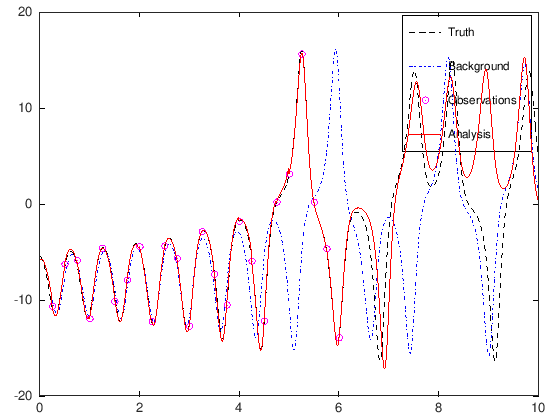

In [ ]:
%%octave

%-----------------------------------------------------------------------
%%%%%%%%%%7.  PLOT RESULTS
%-----------------------------------------------------------------------

%Plot analysed solution of x
figure(h1)
plot(q,x,'k--');
hold on
plot(q,xb,'b-.');
plot(v(2:nobs),xob(vec(2:nobs)),'om');
if l_assim==0
  plot(q,x_sc(1,:),'r-');
elseif l_assim==1
  plot(q,x_oi(1,:),'r-');
elseif l_assim==2
  plot(q,x_ac(1,:),'r-');
elseif l_assim==3
  plot(q,x_kf(1,:),'r-');
end
legend("Truth","Background","Observations","Analysis")
yminmax=get(gca,'YLim');
yspace=(yminmax(2)-yminmax(1))*0.01;
yvals=yminmax(1):yspace:yminmax(2);
xval=(tmax-ob_f)*h;
%%line(xval,yvals,'LineStyle',':','Color','k')
hold on
print -dpng -r240 x_results.png;

### Plot analysed solution of Z

ans = -14.590

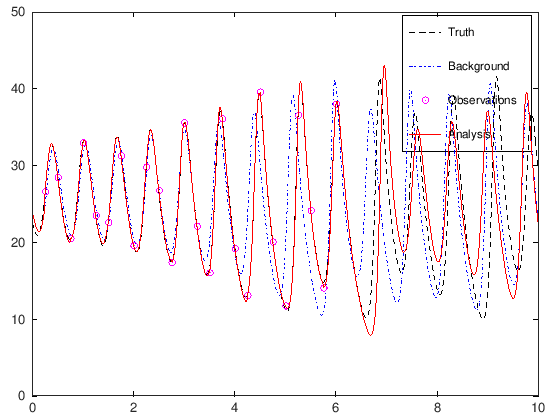

In [ ]:
%%octave

figure(h2);
plot(q,z,'k--');
hold on
plot(q,zb,'b-.');
plot(v(2:nobs),zob(vec(2:nobs)),'om');
%Plot analysed solution of z
if l_assim==0
  plot(q,x_sc(3,:),'r-');
elseif l_assim==1
  plot(q,x_oi(3,:),'r-');
elseif l_assim==2
  plot(q,x_ac(3,:),'r-');
elseif l_assim==3
  plot(q,x_kf(3,:),'r-');
end
legend("Truth","Background","Observations","Analysis")
yminmax=get(gca,'YLim');
yspace=(yminmax(2)-yminmax(1))*0.01;
yvals=yminmax(1):yspace:yminmax(2);
xval=(tmax-ob_f)*h;
%line(xval,yvals,'LineStyle',':','Color','k')
hold on

## **Ploting Error**

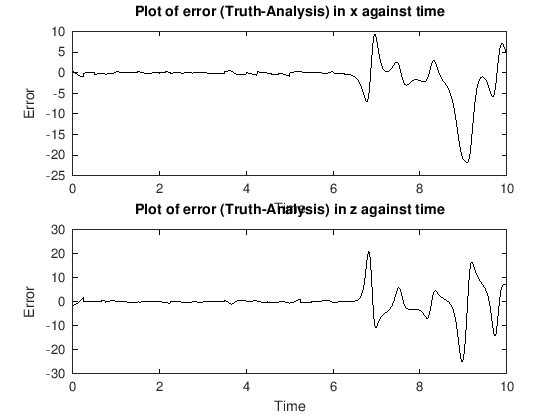

In [ ]:
%%octave

if l_assim==0
  x_err = x'-x_sc(1,:);
  z_err = z'-x_sc(3,:);
elseif l_assim==1
  x_err = x'-x_oi(1,:);
  z_err = z'-x_oi(3,:);
elseif l_assim==2
  x_err = x'-x_ac(1,:);
  z_err = z'-x_ac(3,:);
elseif l_assim==3
  x_err = x'-x_kf(1,:);
  z_err = z'-x_kf(3,:);
end
%save
h3=figure(3);
clf;
subplot(2,1,1)
plot(q,x_err,'k-');
xlabel('Time');ylabel('Error')
title('Plot of error (Truth-Analysis) in x against time')
yminmax=get(gca,'YLim');
yspace=(yminmax(2)-yminmax(1))*0.01;
yvals=yminmax(1):yspace:yminmax(2);
%%line(xval,yvals,'LineStyle',':','Color','k')
%
subplot(2,1,2)
plot(q,z_err,'k-')
xlabel('Time');ylabel('Error')
title('Plot of error (Truth-Analysis) in z against time')
yminmax=get(gca,'YLim');
yspace=(yminmax(2)-yminmax(1))*0.01;
yvals=yminmax(1):yspace:yminmax(2);
%%line(xval,yvals,'LineStyle',':','Color','k')

%imagename=strcat("varq_error_",assim_str,"_",num2str(n_its),".png");
%disp(imagename);
%print(imagename)


### Write out options chosen

In [ ]:
%%octave

% Determine screen size and set up figure positions
ss=get(0,'ScreenSize');
fig_width=0.55*ss(3);
fig_height=0.4*ss(4);
pos_1=[0.02*ss(3),0.55*ss(4),fig_width,fig_height];
pos_2=[0.02*ss(3),0.05*ss(4),fig_width,fig_height];
pos_3=[0.6*ss(3),0.45*ss(4),0.4*ss(3),0.45*ss(4)];
pl=0.6*ss(3);
pb=0.05*ss(4);
pw=0.3*ss(3);
ph=0.3*ss(4);
pos_4=[pl,pb,pw,ph];
pos_5=[0.02*pw,0.8*ph,0.95*pw,0.2*ph];
pos_6=[0.02*pw,0.02*ph,0.95*pw,0.75*ph];

In [ ]:
%%octave
%
%-----------------------------------------------------------------------
% Write out options chosen
%
text1={'List of options chosen'};
text2={['Analysis scheme: ' assim_str]};
if (l_assim==0 | l_assim==2)
  text3={['Number of iterations: ' num2str(n_its)]};
else
  text3='';
end
if l_assim~0
  if l_weight==0
    text4={['Using incorrect weighting matrices']};
  else
    text4={['Using correct weighting matrices']};
  end
else
  text4='';
end
text5={['Time steps between observations: ' num2str(ob_f)]};
if l_noise==0
  text6={['No noise on observations']};
  text7='';
else
  text6={['Observations have random noise with variance ' num2str(sd)]};
  if l_read_noise==0
    text7={['Noise generated in program and saved to file']};
  else
    text7={['Noise read in from previously generated file']};
  end
end
%
str1=[text2;text3;text4;text5;text6;text7];
disp(str1)

%%%%%%%%%%  END OF PROGRAM  %%%%%%%%%%


ans = 1

{

  [1,1] = Analysis scheme: Kalman filter

  [2,1] = Using correct weighting matrices

  [3,1] = Time steps between observations: 25

  [4,1] = Observations have random noise with variance 0.1

  [5,1] = Noise generated in program and saved to file

}